In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('titanic_train_1.csv')
df.tail()
# df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,Ticket,Fare,Cabin
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.00,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C148
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,370376,7.75,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [5]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', "Fare"], inplace=True, axis=1)

In [5]:
df.head()

,Survived,Pclass,Gender,Age,Cabin
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C85
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C123
4,0,3,male,35.0,NaN


In [6]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [5]:
#df['Gender'].value_counts()

df['Survived'].value_counts()

NameError: name 'df' is not defined

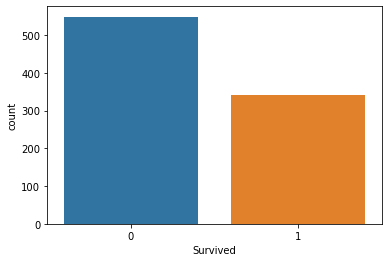

In [7]:
sns.countplot(data=df, x='Survived')

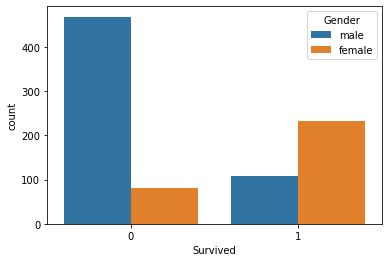

In [9]:
sns.countplot('Survived', data=df, hue='Gender')

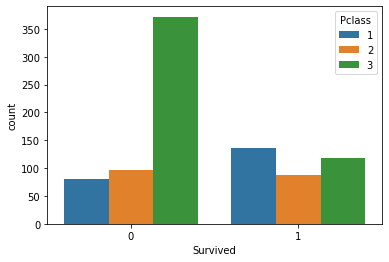

In [49]:
sns.countplot(data=df, x='Survived', hue='Pclass')

In [12]:
df.head()

,Survived,Pclass,Gender,Age,Cabin
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C85
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C123
4,0,3,male,35.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   Cabin     204 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [14]:
df.isnull()

,Survived,Pclass,Gender,Age,Cabin
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
886,False,False,False,False,True
887,False,False,False,False,False
888,False,False,False,True,True
889,False,False,False,False,False


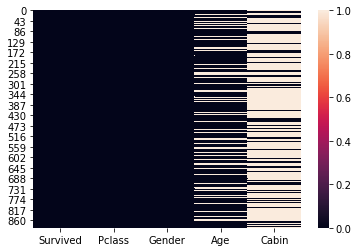

In [9]:
sns.heatmap(df.isnull())

In [11]:
df.drop(['Cabin'], axis=1, inplace=True)

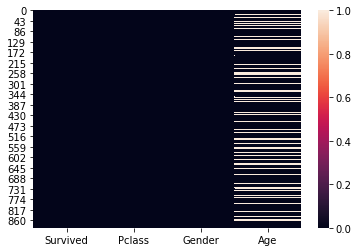

In [12]:
sns.heatmap(df.isnull())

In [13]:
def inputAge(cols):  # cols stores age & PClass values in list format
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df['AgeNew'] = df[['Age','Pclass']].apply(inputAge, axis=1)

In [15]:
df.head(20)

,Survived,Pclass,Gender,Age,AgeNew
0,0,3,male,22.0,22.0
1,1,1,female,38.0,38.0
2,1,3,female,26.0,26.0
3,1,1,female,35.0,35.0
4,0,3,male,35.0,35.0
5,0,3,male,NaN,24.0
6,0,1,male,54.0,54.0
7,0,3,male,2.0,2.0
8,1,3,female,27.0,27.0
9,1,2,female,14.0,14.0


In [16]:
df.isnull()

,Survived,Pclass,Gender,Age,AgeNew
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


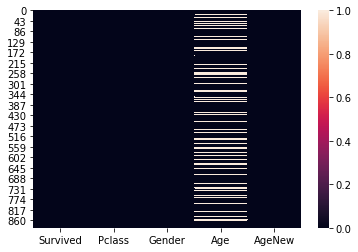

In [17]:
sns.heatmap(df.isnull())

In [21]:
df.drop(['Age'], axis=1, inplace=True)

In [22]:
df.head()

,Survived,Pclass,Gender,AgeNew
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


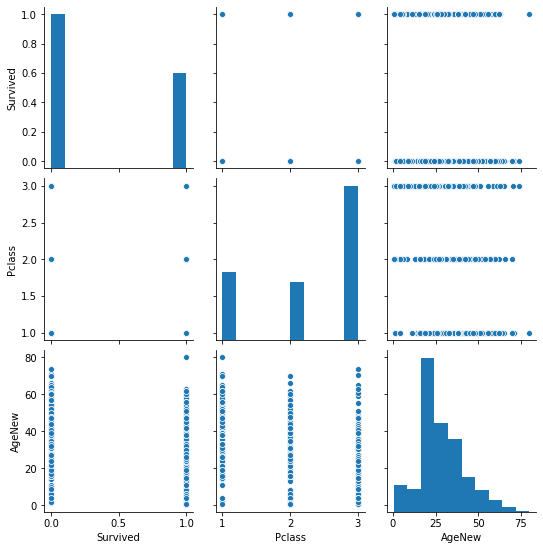

In [23]:
sns.pairplot(data=df)

In [20]:
df.corr()

,Survived,Pclass,AgeNew
Survived,1.000000,-0.338481,-0.046746
Pclass,-0.338481,1.000000,-0.411805
AgeNew,-0.046746,-0.411805,1.000000


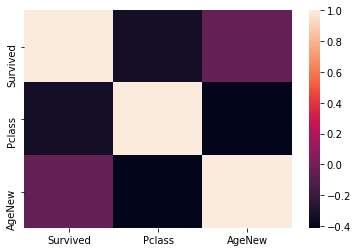

In [27]:
sns.heatmap(df.corr())